<a href="https://colab.research.google.com/github/khushidubeyokok/AI-ML/blob/main/02_Unsupervised_learning/07_IsolationForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Isolation Forest

- Anomaly detection is the process of identifying data points that deviate significantly from the normal pattern of the dataset.
- Isolation Forest is a bagging-style ensemble method that detects anomalies by randomly splitting data into isolation trees.
- The intuition is that anomalies are easier to isolate because they are few and far from dense clusters, requiring fewer random splits to separate from the rest.

## Working of isolation forest
[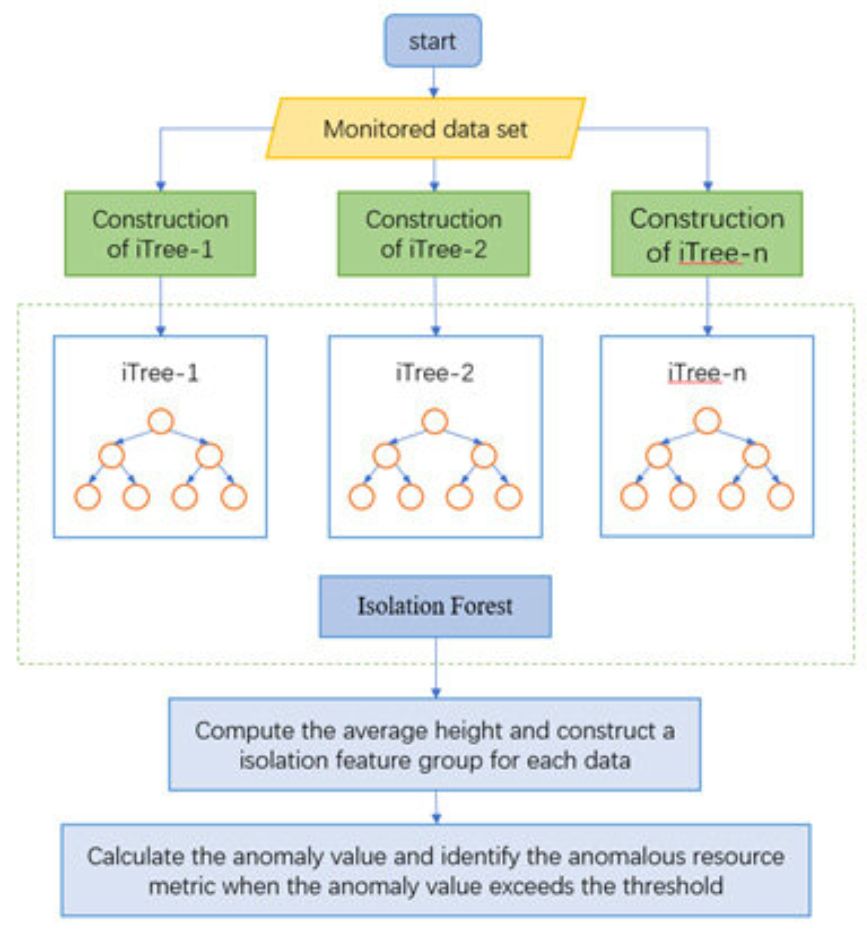](https://www.researchgate.net/figure/The-structure-of-the-isolation-forest-algorithm_fig3_384131076)


In this notebook we will use `make_blobs` dataset from sklearn and manually add outliers to the dataset using random points

In [52]:
from sklearn.datasets import make_blobs
import numpy as np

# Normal data
x, y = make_blobs(n_samples=1000, centers=2, cluster_std=0.5, random_state=42)

# Add anomalies
outliers = np.random.uniform(low=-6, high=6, size=(20, 2))
x_all = np.vstack([x, outliers])

In [53]:
x.shape

(1000, 2)

In [54]:
outliers.shape

(20, 2)

Manually plotting anomalies

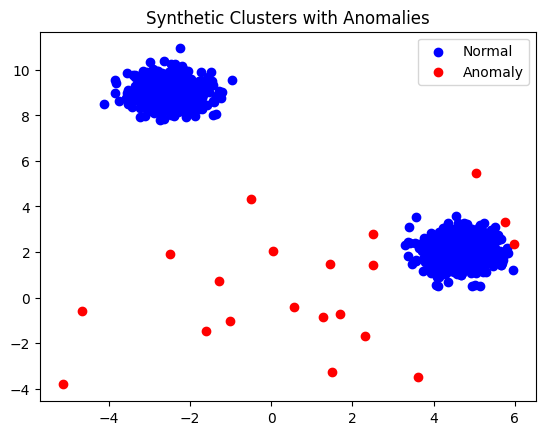

In [55]:
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], c='blue', label='Normal')
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', label='Anomaly')
plt.legend()
plt.title("Synthetic Clusters with Anomalies")
plt.show()

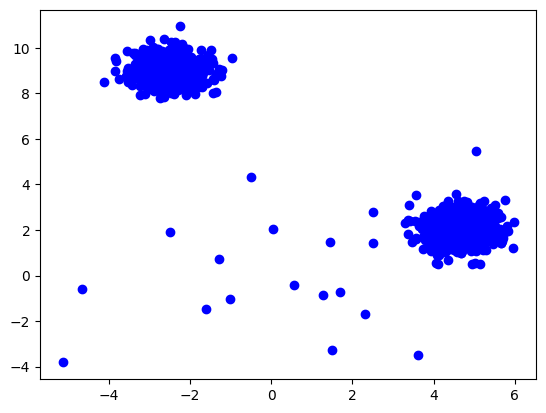

In [56]:
plt.scatter(x_all[:, 0], x_all[:, 1], c='blue', label='Normal')

Using isolation forest to detect anomalies

In [57]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest()

In [58]:
predicted=clf.fit_predict(x_all)

Anomalies have -1 value and normal data points have predicted value as 1 hence we can plot anomalies the following way

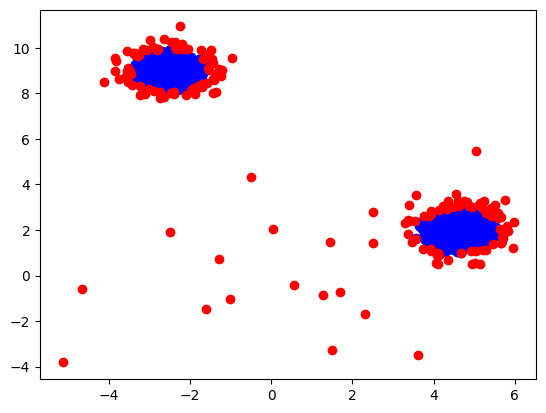

In [59]:
plt.scatter(x_all[predicted==1, 0], x_all[predicted==1, 1], c='blue', label='Normal')
plt.scatter(x_all[predicted==-1, 0], x_all[predicted==-1, 1], c='red', label='Normal')

Changing contamination value (since 20 data points were anomalies out of 1000 we can choose 0.02 as contamination value)

In [60]:
clf=IsolationForest(contamination=0.02)
predicted=clf.fit_predict(x_all)

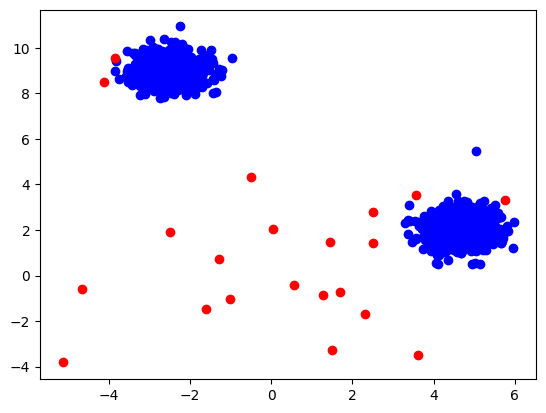

In [61]:
plt.scatter(x_all[predicted==1, 0], x_all[predicted==1, 1], c='blue', label='Normal')
plt.scatter(x_all[predicted==-1, 0], x_all[predicted==-1, 1], c='red', label='Normal')